---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


def blight_model():
    train = pd.read_csv('train.csv',encoding = ' latin1 ')
    
    return train.head()

In [149]:
train = pd.read_csv('train.csv',encoding = ' latin1')
validation = pd.read_csv('test.csv',encoding = ' latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [150]:
train.iloc[:,[11,12,13]] = train.iloc[:,[11,12,13]].apply(str)

val_columns = validation.columns

train_nan = train[train['compliance'].notna()]
X = train_nan[val_columns]
y = train_nan['compliance']
print('inicial size: {}, size whitout nans:{}, ratio: {} '.format(train.shape[0],train_nan.shape[0],round(train_nan.shape[0]/train.shape[0],2)))

inicial size: 250306, size whitout nans:159880, ratio: 0.64 


In [151]:
X= X[['ticket_id', 'agency_name', 'inspector_name',
       'violation_street_number', 'violation_street_name','mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state','country', 'ticket_issued_date', 
       'violation_code', 'violation_description', 'fine_amount', 'discount_amount', 'judgment_amount', 'grafitti_status']]
X.set_index('ticket_id', inplace =  True)


In [152]:
types = pd.DataFrame(zip(X.columns,X.dtypes),columns=['Variable','Type']) 
categorical = types['Variable'][types['Type'] == 'object']

v = []
c = []
for var in categorical:
    v.append(var)
    c.append(X[var].unique().shape[0])
qtes = pd.DataFrame(zip(v,c),columns=['Variable','Qte'])
qtes


,Variable,Qte
0,agency_name,5
1,inspector_name,159
2,violation_street_name,1716
3,mailing_address_str_name,28441
4,city,4093
5,state,60
6,country,1
7,ticket_issued_date,68097
8,violation_code,189
9,violation_description,207


In [153]:
X['ticket_issued_month'] = pd.DatetimeIndex(X['ticket_issued_date']).month
X['ticket_issued_year'] = pd.DatetimeIndex(X['ticket_issued_date']).year

X = X.drop(columns=['violation_code','country','violation_description', 'grafitti_status','city','mailing_address_str_name','violation_street_name','inspector_name','ticket_issued_date'])

In [154]:
X.columns

Index(['agency_name', 'violation_street_number', 'mailing_address_str_number',
       'state', 'fine_amount', 'discount_amount', 'judgment_amount',
       'ticket_issued_month', 'ticket_issued_year'],
      dtype='object')

In [116]:
types = pd.DataFrame(zip(X.columns,X.dtypes),columns=['Variable','Type']) 
categorical = types['Variable'][types['Type'] == 'object']

v = []
c = []
for var in categorical:
    v.append(var)
    c.append(X[var].unique().shape[0])
qtes = pd.DataFrame(zip(v,c),columns=['Variable','Qte'])
qtes

,Variable,Qte
0,agency_name,5
1,state,60


In [156]:
# X['violation_code'] = X['violation_code'].str.split('-',expand=True)[0]
# X['violation_code'].unique()

list(categorical)

['agency_name',
 'inspector_name',
 'violation_street_name',
 'mailing_address_str_name',
 'city',
 'state',
 'country',
 'ticket_issued_date',
 'violation_code',
 'violation_description',
 'grafitti_status']

In [118]:
X = pd.get_dummies(X, columns=categorical,prefix=categorical)

In [119]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X.fillna(-1), y, test_size=0.3, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_prob = gnb.fit(X_train, y_train).predict_proba(X_test)

In [120]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix

(accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred))


(0.9343882912184138, 0.09067131647776809, 0.9454545454545454)

In [121]:
confusion_matrix(y_test, y_pred)

array([[44505,    18],
       [ 3129,   312]], dtype=int64)

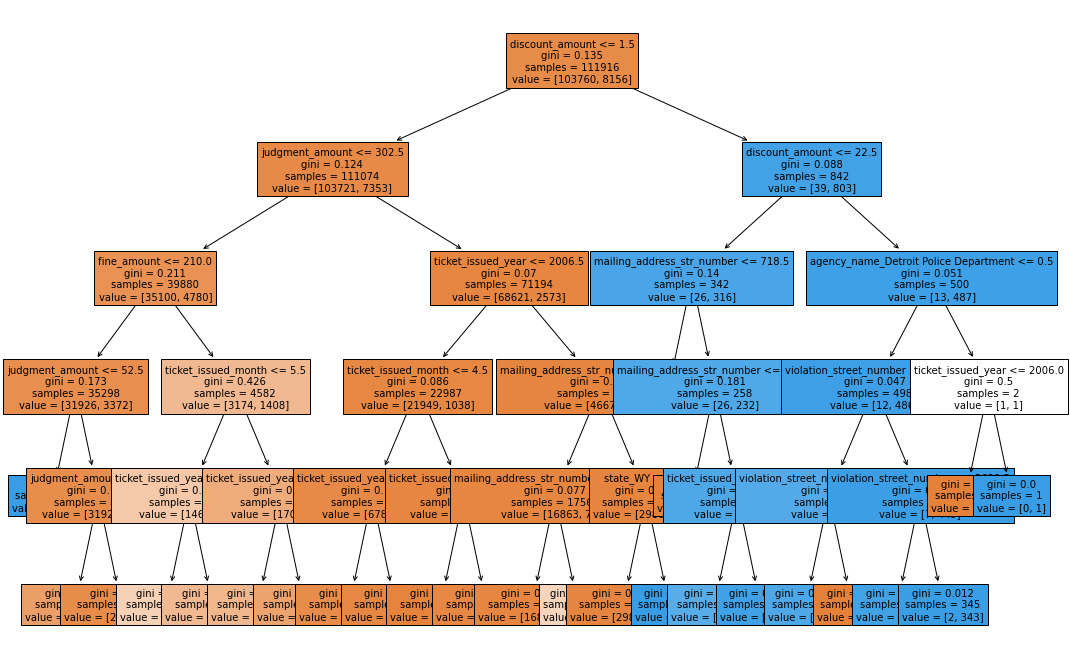

In [147]:
%matplotlib inline
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(18,12)) 

tree.plot_tree(clf,fontsize=10,feature_names=X_train.columns,filled=True)

plt.show()

In [123]:
y_pred_t = clf.predict(X_test)
y_pred_prob_t = clf.predict_proba(X_test)

(accuracy_score(y_test, y_pred_t),recall_score(y_test, y_pred_t),precision_score(y_test, y_pred_t))

(0.9345550829789009, 0.0929962220284801, 0.9467455621301775)

In [124]:
y_d = X_test['discount_amount'].apply(lambda x: 1 if x > 0 else 0)

In [129]:
(accuracy_score(y_test, y_d),recall_score(y_test, y_d),precision_score(y_test, y_d))

(0.9345550829789009, 0.0929962220284801, 0.9467455621301775)

In [130]:
y_pred_prob_t

array([[0.96385931, 0.03614069],
       [0.96385931, 0.03614069],
       [0.88014042, 0.11985958],
       ...,
       [0.88014042, 0.11985958],
       [0.96385931, 0.03614069],
       [0.96385931, 0.03614069]])

In [133]:
y_pred_t

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
y_pred_prob_t[:,1]

array([0.03614069, 0.03614069, 0.11985958, ..., 0.11985958, 0.03614069,
       0.03614069])

In [137]:
from sklearn.metrics import roc_curve,plot_roc_curve

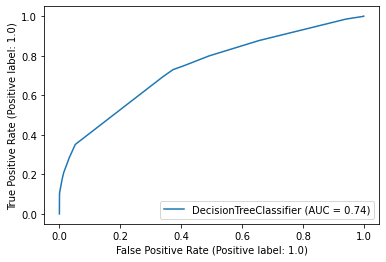

In [145]:
plot_roc_curve(clf, X_test, y_test) 

In [163]:
pd.DataFrame([X_test.index,X_test.index],axis = 0)

TypeError: __init__() got an unexpected keyword argument 'axis'